In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt

import plotly.express as px
import seaborn as sns

from IPython.display import display # to prettyprint pandas table

import sanode

ModuleNotFoundError: No module named 'plotly.express'

In [2]:
groupColorDict = {
    '0': 'goldenrod',
    '1': 'red',
    '11': 'yellow',
    '2': 'green',
    '3': 'blue',
    '4': 'magenta',
}

def defaultSanDict():
    retDict = {
        #'loadedSan': '',
        'df': None,
        'maxImg': None, # when we have one mosaic
        'maxImg1': None, # need one for headMid and another for tail
        'maxImg2': None, 
        'yAlignHeadMid': None, # x/y coordinate of common feature (to merge headMid and tail)
        'yAlignTail': None,
        'yTailOffset': None,
        'xAlignHeadMid': None,
        'xAlignTail': None,
        'xTailOffset': None,
        'ySup': None, # list of y-range in superior
        'yInf': None, # list of y-range in superior
    }
    return retDict
    

sns.set_context("talk") # ('notebook', paper', 'talk', 'poster')


In [3]:
# fil this in, one san per key
mainSanDict = {}

#
if 1:
    # san3 (cd31), made of two tracing folders (head and tail)
    loadedSan = 'SAN3'

    origRegions = 'headMid'
    path = '/media/cudmore/data/san-density/SAN3/tracing/head/SAN3_head_BIG__ch2.tif'
    df1, maxImg1 = sanode.bReadROI.loadRoiFiles(path, loadedSan, origRegions)

    origRegions = 'tail'
    path = '/media/cudmore/data/san-density/SAN3/tracing/tail/SAN3_tail_BIG__ch2.tif'
    df2, maxImg2 = sanode.bReadROI.loadRoiFiles(path, loadedSan, origRegions)

    df = pd.concat( [df1, df2] )

    #
    # x/y coordinates of common feature in headMic and tail
    yAlignHeadMid = 4640
    yAlignTail = 57
    yTailOffset = yAlignHeadMid - yAlignTail

    xAlignHeadMid = 2223
    xAlignTail = 2806
    xTailOffset = xAlignHeadMid - xAlignTail

    # san3, selected from original image coordinates, use good presentation image
    # specify this on load, after that we have finalRegion in (superior, inferior)
    ySup = [0, 4000]
    yInf = [0, 1200]

    df.loc[(df['origRegions']=='headMid') & (df['yMid']>ySup[0]) & (df['yMid']<ySup[1]), 'finalRegion'] = 'superior'
    df.loc[(df['origRegions']=='tail') & (df['yMid']>yInf[0]) & (df['yMid']<yInf[1]), 'finalRegion'] = 'inferior'

    mainSanDict[loadedSan] = defaultSanDict()
    mainSanDict[loadedSan]['df'] = df
    #
    mainSanDict[loadedSan]['yAlignHeadMid'] = yAlignHeadMid
    mainSanDict[loadedSan]['yAlignTail'] = yAlignTail
    mainSanDict[loadedSan]['yTailOffset'] = yTailOffset
    mainSanDict[loadedSan]['xAlignHeadMid'] = xAlignHeadMid
    mainSanDict[loadedSan]['xAlignTail'] = xAlignTail
    mainSanDict[loadedSan]['xTailOffset'] = xTailOffset
    #
    mainSanDict[loadedSan]['ySup'] = ySup # list of y-range in superior
    mainSanDict[loadedSan]['yInf'] = yInf # list of yRange in inferior
    #
    mainSanDict[loadedSan]['maxImg1'] = maxImg1 # list of yRange in inferior
    mainSanDict[loadedSan]['maxImg2'] = maxImg2 # list of yRange in inferior
    
if 1:
    # san4 (cd31), made of two tracing folders (head and tail)
    loadedSan = 'SAN4'
    
    origRegions = 'headMid'
    path = '/media/cudmore/data/san-density/SAN4/tracing/head/SAN4_head_BIG__ch2.tif'
    df1, maxImg1 = sanode.bReadROI.loadRoiFiles(path, loadedSan, origRegions)
        
    origRegions = 'tail'
    path = '/media/cudmore/data/san-density/SAN4/tracing/tail/SAN4_tail_BIG__ch2.tif'
    df2, maxImg2 = sanode.bReadROI.loadRoiFiles(path, loadedSan, origRegions)

    df = pd.concat( [df1, df2] )
    
    #
    # x/y coordinates of common feature in headMic and tail
    yAlignHeadMid = 6976
    yAlignTail = 326
    yTailOffset = yAlignHeadMid - yAlignTail
    
    xAlignHeadMid = 1776
    xAlignTail = 993
    xTailOffset = xAlignHeadMid - xAlignTail

    # san4, selected from original image coordinates, use GOOGLE presentation image
    # specify this on load, after that we have finalRegion in (superior, inferior)
    ySup = [0, 5500]
    yInf = [0, 1500]

    df.loc[(df['origRegions']=='headMid') & (df['yMid']>ySup[0]) & (df['yMid']<ySup[1]), 'finalRegion'] = 'superior'
    df.loc[(df['origRegions']=='tail') & (df['yMid']>yInf[0]) & (df['yMid']<yInf[1]), 'finalRegion'] = 'inferior'

    mainSanDict[loadedSan] = defaultSanDict()
    mainSanDict[loadedSan]['df'] = df
    mainSanDict[loadedSan]['yAlignHeadMid'] = yAlignHeadMid
    mainSanDict[loadedSan]['yAlignTail'] = yAlignTail
    mainSanDict[loadedSan]['yTailOffset'] = yTailOffset
    mainSanDict[loadedSan]['xAlignHeadMid'] = xAlignHeadMid
    mainSanDict[loadedSan]['xAlignTail'] = xAlignTail
    mainSanDict[loadedSan]['xTailOffset'] = xTailOffset
    #
    mainSanDict[loadedSan]['ySup'] = ySup # list of y-range in superior
    mainSanDict[loadedSan]['yInf'] = yInf # list of yRange in inferior
    #
    mainSanDict[loadedSan]['maxImg1'] = maxImg1 # list of yRange in inferior
    mainSanDict[loadedSan]['maxImg2'] = maxImg2 # list of yRange in inferior

if 1:
    # san5 (lectin)
    loadedSan = 'SAN5'
    origRegions = 'headMidTail'
    path = '/media/cudmore/data/san-density/SAN5/tracing/SAN5_BIG__ch1.tif'
    df, maxImg = sanode.bReadROI.loadRoiFiles(path, loadedSan, origRegions)

    numRows,numCols = maxImg.shape
    
    # san5
    ySup = [1, 3000]
    yInf = [4400, numRows]

    # origRegions is redundant here, this SAN is just ONE image
    df.loc[(df['origRegions']==origRegions) & (df['yMid']>ySup[0]) & (df['yMid']<ySup[1]), 'finalRegion'] = 'superior'
    df.loc[(df['origRegions']==origRegions) & (df['yMid']>yInf[0]) & (df['yMid']<yInf[1]), 'finalRegion'] = 'inferior'

    mainSanDict[loadedSan] = defaultSanDict()
    mainSanDict[loadedSan]['df'] = df
    #
    mainSanDict[loadedSan]['ySup'] = ySup # list of y-range in superior
    mainSanDict[loadedSan]['yInf'] = yInf # list of yRange in inferior
    #
    mainSanDict[loadedSan]['maxImg'] = maxImg # list of yRange in inferior

if 1:
    # san6 (lectin)
    loadedSan = 'SAN6'
    origRegions = 'headMidTail'
    path = '/media/cudmore/data/san-density/SAN6/tracing/SAN6_BIG__ch1.tif'
    df, maxImg = sanode.bReadROI.loadRoiFiles(path, loadedSan, origRegions)

    # san6
    ySup = [1, 5500]
    yInf = [9200, 12000]

    # origRegions is redundant here, this SAN is just ONE image
    df.loc[(df['origRegions']==origRegions) & (df['yMid']>ySup[0]) & (df['yMid']<ySup[1]), 'finalRegion'] = 'superior'
    df.loc[(df['origRegions']==origRegions) & (df['yMid']>yInf[0]) & (df['yMid']<yInf[1]), 'finalRegion'] = 'inferior'

    mainSanDict[loadedSan] = defaultSanDict()
    mainSanDict[loadedSan]['df'] = df
    #
    mainSanDict[loadedSan]['ySup'] = ySup # list of y-range in superior
    mainSanDict[loadedSan]['yInf'] = yInf # list of yRange in inferior
    #
    mainSanDict[loadedSan]['maxImg'] = maxImg # list of yRange in inferior

#
# mash everything we just loaded into a big masterDf
for idx, k in enumerate(mainSanDict.keys()):
    df0 = mainSanDict[k]['df']
    if idx == 0:
        print('creating san:', k, 'with', len(df0.index), 'lines')
        dfMaster = df0
    else:
        print('adding san:', k, 'with', len(df0.index), 'lines')
        dfMaster = dfMaster.append(df0, ignore_index=True) 
print('final rows in dfMaster:', len(dfMaster.index))

if 0:
    #
    for k, d in mainSanDict.items():
        print('\n', k)
        for k2, v in d.items():
            if isinstance(v, pd.core.frame.DataFrame):
                df = v
                desc = df.groupby('group')['diameter_um'].describe()
                display(desc)
            elif isinstance(v, np.ndarray):
                print(k2, ':', v.shape)
            else:
                print(k2, ':', v)


loadRoiFile() path: /media/cudmore/data/san-density/SAN3/tracing/head/SAN3_head_BIG__ch2.tif
  shape: (83, 2370, 5214)
  x/y/z voxel (um/pixel) 0.6214808646041788 0.6214808646041788 1
  loading zipFilePath: /media/cudmore/data/san-density/SAN3/tracing/head/RoiSet.zip
[1 2 3 0 4]

group: 1 numInGroup (number of line ROI): 69
      *** Finished vesssel 
           at dfIdx 1
           group 1
           masterVesselIdx 0
           from dfStartIdx 0
           to dfStopIdx 0
           starting new vessel dfStartIdx: 1
      *** Finished vesssel 
           at dfIdx 4
           group 1
           masterVesselIdx 1
           from dfStartIdx 1
           to dfStopIdx 3
           starting new vessel dfStartIdx: 4
      *** Finished vesssel 
           at dfIdx 5
           group 1
           masterVesselIdx 2
           from dfStartIdx 4
           to dfStopIdx 4
           starting new vessel dfStartIdx: 5
      *** Finished vesssel 
           at dfIdx 12
           group 1
          

[1 2 3 4 0]

group: 1 numInGroup (number of line ROI): 95
      *** Finished vesssel 
           at dfIdx 332
           group 1
           masterVesselIdx 0
           from dfStartIdx 0
           to dfStopIdx 90
           starting new vessel dfStartIdx: 332
    === AFTER loop, cleaning up vessel segment
      masterVesselIdx: 1
      dfStartIdx: 332
      dfStopIdx: 335

group: 2 numInGroup (number of line ROI): 102
      *** Finished vesssel 
           at dfIdx 253
           group 2
           masterVesselIdx 2
           from dfStartIdx 91
           to dfStopIdx 150
           starting new vessel dfStartIdx: 253
      *** Finished vesssel 
           at dfIdx 288
           group 2
           masterVesselIdx 3
           from dfStartIdx 253
           to dfStopIdx 265
           starting new vessel dfStartIdx: 288
      *** Finished vesssel 
           at dfIdx 336
           group 2
           masterVesselIdx 4
           from dfStartIdx 288
           to dfStopIdx 304
       

  loading zipFilePath: /media/cudmore/data/san-density/SAN6/tracing/RoiSet.zip
[1 2 3 4]

group: 1 numInGroup (number of line ROI): 79
      *** Finished vesssel 
           at dfIdx 5
           group 1
           masterVesselIdx 0
           from dfStartIdx 0
           to dfStopIdx 4
           starting new vessel dfStartIdx: 5
      *** Finished vesssel 
           at dfIdx 9
           group 1
           masterVesselIdx 1
           from dfStartIdx 5
           to dfStopIdx 8
           starting new vessel dfStartIdx: 9
      *** Finished vesssel 
           at dfIdx 10
           group 1
           masterVesselIdx 2
           from dfStartIdx 9
           to dfStopIdx 9
           starting new vessel dfStartIdx: 10
      *** Finished vesssel 
           at dfIdx 11
           group 1
           masterVesselIdx 3
           from dfStartIdx 10
           to dfStopIdx 10
           starting new vessel dfStartIdx: 11
      *** Finished vesssel 
           at dfIdx 12
           group

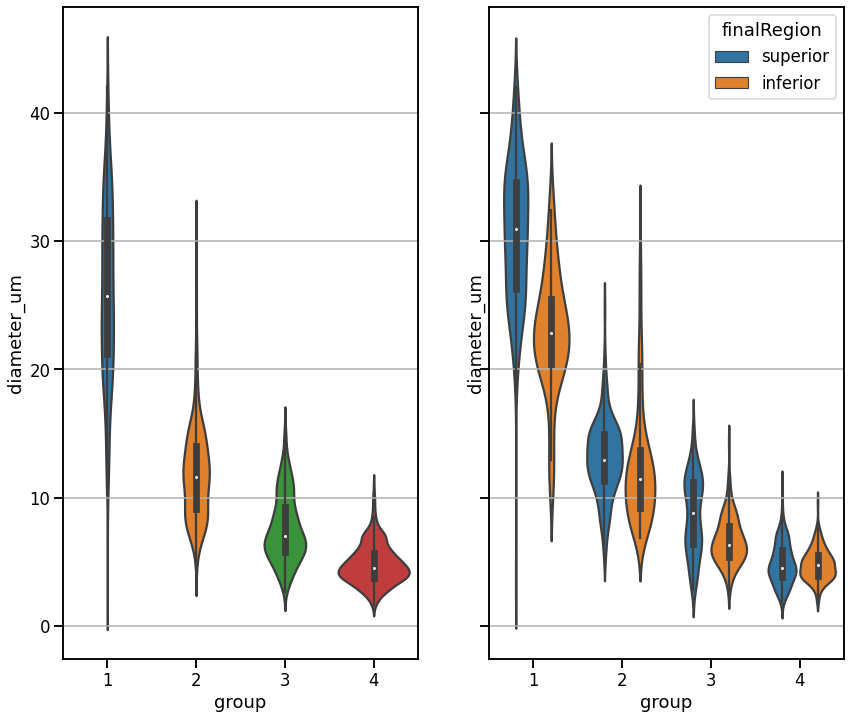

In [4]:
# plot superior/inferior for all open san and all groups

# limit plots to subset of groups
groupList = [1,2,3,4]
groupPlot = dfMaster[ dfMaster['group'].isin(groupList)]

fig, axs = plt.subplots(1,2, figsize=(14,12), sharey=True)

sns.violinplot(data=groupPlot, x='group', y='diameter_um',
               ax=axs[0])
axs[0].grid(which='major', axis='y')

sns.violinplot(data=groupPlot, x='group', y='diameter_um', hue='finalRegion',
               hue_order=['superior', 'inferior'],
               ax=axs[1])
axs[1].grid(which='major', axis='y')

plt.show;

# ask if different between pooled group 0-1, 1-2, 2-3, 3-4 (both superior/inferior)

# NEED TO ADD Bonf multiple comparison correction

In [5]:
# ask if different between pooled group 0-1, 1-2, 2-3, 3-4 (both superior/inferior)
desc = dfMaster.groupby('group')['diameter_um'].describe()
display(desc)

theseGroups = [1,2,3,4]
for idx, group in enumerate(theseGroups):
    if idx > 0:
        prevGroup = theseGroups[idx-1]
        prevDiamList = dfMaster[ dfMaster['group']==prevGroup ]['diameter_um'].tolist()
        thisDiamList = dfMaster[ dfMaster['group']==group ]['diameter_um'].tolist()
 
        #prevMean = np.nanmean(prevDiamList)
        #thisMean = np.nanmean(thisDiamList)
        
        # alternative from {None, ‘two-sided’, ‘less’, ‘greater’}
        statistic, p = scipy.stats.mannwhitneyu(prevDiamList, thisDiamList) #, alternative='two-sided')
        #print(f'  prevMean:{prevMean}, thisMean:{thisMean}')
        print(f'{prevGroup}:{group}, statistic:{statistic} p:{p}')


count       mean       std        min        25%        50%        75%  \
group                                                                           
0       42.0   6.564074  2.164601   4.030053   5.254284   5.915006   6.785561   
1      550.0  26.178923  6.935079   3.623825  21.165687  25.685953  31.681107   
2      571.0  11.962566  3.785627   4.481562   9.145016  11.586244  14.021247   
3      543.0   7.592928  2.621412   2.668172   5.720549   7.014754   9.288258   
4      547.0   4.779966  1.528888   1.639956   3.728885   4.509485   5.658569   
11      63.0  20.025544  1.968481  16.901034  18.383449  19.957024  21.322269   

             max  
group             
0      14.231233  
1      42.020518  
2      31.065083  
3      15.586661  
4      10.921776  
11     25.143188

1:2, statistic:11658.0 p:7.9933784168639e-159
2:3, statistic:49335.0 p:1.2807666757319355e-86
3:4, statistic:51128.0 p:1.1723937319316749e-78


# ask if difference between sup/inf WITHIN each group [1,2,3,4]
# NEED TO ADD Bonf multiple comparison correction

# 20201130, conclusion is:

- superior 1/2/3 is larger diameter than inferior
- superior 4 (capillary) is not

In [6]:
# ask if difference between sup/inf WITHIN each group [1,2,3,4]

print('SUPERIOR - across groups')
tmpDf = dfMaster[ (dfMaster['finalRegion']=='superior') ]
desc = tmpDf.groupby('group')['diameter_um'].describe()
display(desc)

print('INFERIOR - across groups')
tmpDf = dfMaster[ (dfMaster['finalRegion']=='inferior') ]
desc = tmpDf.groupby('group')['diameter_um'].describe()
display(desc)

theseGroups = [1,2,3,4]
for idx, group in enumerate(theseGroups):
    supDf = dfMaster[ (dfMaster['group']==group) & (dfMaster['finalRegion']=='superior') ]
    supDiamList = supDf['diameter_um'].tolist()
    
    infDf = dfMaster[ (dfMaster['group']==group) & (dfMaster['finalRegion']=='inferior') ]
    infDiamList = infDf['diameter_um'].tolist()

    # mean across all 'line ROI' in group
    supMean = np.nanmean(supDiamList)
    infMean = np.nanmean(infDiamList)

    # alternative from {None, ‘two-sided’, ‘less’, ‘greater’}
    statistic, p = scipy.stats.mannwhitneyu(supDiamList, infDiamList) #, alternative='two-sided')
    print(f'group:{group}, superior vs inferior')
    print(f'  supMean:{supMean}, infMean:{infMean}')
    print(f'  statistic:{statistic} p:{p}')

    #
    # mean diameter of EACH VESSEL SEGMENT
    #
    
    #
    # new 20201201
    # THIS DOES NOT WORK, we are using mashed/combined df (across san) we CANNOT group by masterVesselIdx !!!
    # to do, get list of mean of each masterVesselIdx (use bReadROI.parseBranches())
    '''
    supSegmentMeanList = supDf.groupby('masterVesselIdx')['diameter_um'].mean().tolist()
    infSegmentMeanList = infDf.groupby('masterVesselIdx')['diameter_um'].mean().tolist()
 
    nSupSeg = len(supSegmentMeanList)
    nInfSeg = len(infSegmentMeanList)
    
    supSegMean = np.nanmean(supSegmentMeanList)
    infSegMean = np.nanmean(infSegmentMeanList)

    statistic, p = scipy.stats.mannwhitneyu(supSegmentMeanList, infSegmentMeanList) #, alternative='two-sided')
    print(f'    supSegMean:{supSegMean}, n={nSupSeg}, infSegMean:{infSegMean}, n={nInfSeg}')
    print(f'    statistic:{statistic} p:{p}')
    '''


SUPERIOR - across groups


count       mean       std        min        25%        50%        75%  \
group                                                                           
0        1.0   9.322213       NaN   9.322213   9.322213   9.322213   9.322213   
1      207.0  30.585936  5.546041   3.623825  26.301075  30.905788  34.580208   
2      195.0  13.073391  2.951311   5.568467  11.323537  12.949725  14.967486   
3      208.0   8.688127  3.019308   2.779347   6.352605   8.789067  11.221104   
4      187.0   4.915639  1.641210   1.757813   3.766332   4.537236   5.941023   
11      16.0  18.217808  1.350316  16.901034  17.421321  17.819385  18.174686   

             max  
group             
0       9.322213  
1      42.020518  
2      24.711845  
3      15.586661  
4      10.921776  
11     21.378289

INFERIOR - across groups


count       mean       std        min        25%        50%        75%  \
group                                                                           
0       39.0   6.526920  2.181376   4.030053   5.266762   5.904068   6.693546   
1      121.0  22.899902  4.778778  10.291843  20.410703  22.821480  25.501760   
2      174.0  12.369590  4.644294   6.815070   9.173131  11.442664  13.701404   
3      176.0   6.636207  1.840688   2.668172   5.342548   6.318860   7.760455   
4      219.0   4.777036  1.209486   1.988738   3.894242   4.724890   5.499391   

             max  
group             
0      14.231233  
1      33.990047  
2      31.065083  
3      14.340995  
4       9.620232

group:1, superior vs inferior
  supMean:30.58593583799113, infMean:22.899902082213544
  statistic:3482.0 p:5.1522933443786175e-28
group:2, superior vs inferior
  supMean:13.073390649601288, infMean:12.369589555526044
  statistic:12389.0 p:3.849234101009418e-06
group:3, superior vs inferior
  supMean:8.688127133702698, infMean:6.636206675311246
  statistic:10844.0 p:2.9276201349967597e-12
group:4, superior vs inferior
  supMean:4.915638659816626, infMean:4.77703558485592
  statistic:20050.0 p:0.35887678658103317


# Compare mean of each vessel segment per group and per region

Uses 'masterVesselIdx' from bReadROI.parseBranches()

This is super important as we see significant differences when pooling all line ROI (for each group) into sup/inf.
This type of pooling is meaningless as different vessel segments (analyzed here) contribute different number of line ROI.
Vessel segments with a ton of line ROI are heavily weighted versus vessel segments with few

As done here, we need to take the mean diamter (um) of each VESSEL SEGMENT for each group in each superio/inferior in each SAN !!!

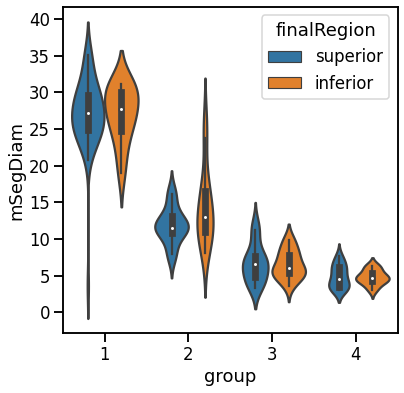

In [7]:
#display(dfMaster)

tmpDf = None

sanStrList = dfMaster['sanStr'].unique()
for sanStr in sanStrList:
    oneSanDf = dfMaster[ dfMaster['sanStr']==sanStr ]
    
    groupList = oneSanDf['group'].unique()
    for idx, group in enumerate(theseGroups):
        supDf = oneSanDf[ (oneSanDf['group']==group) & (oneSanDf['finalRegion']=='superior') ]
        infDf = oneSanDf[ (oneSanDf['group']==group) & (oneSanDf['finalRegion']=='inferior') ]
        
        supMeanSegList = supDf.groupby('masterVesselIdx')['diameter_um'].mean().tolist()
        infMeanSegList = infDf.groupby('masterVesselIdx')['diameter_um'].mean().tolist()
        
        #
        # superior
        df0 = pd.DataFrame({
            'sanStr': sanStr,
            'group': group,
            'finalRegion': 'superior',
            'mSegDiam': supMeanSegList
        })
        if tmpDf is None:
            tmpDf = df0
        else:
            tmpDf = tmpDf.append(df0)

        #
        # inferior
        df0 = pd.DataFrame({
            'sanStr': sanStr,
            'group': group,
            'finalRegion': 'inferior',
            'mSegDiam': infMeanSegList
        })
        if tmpDf is None:
            tmpDf = df0
        else:
            tmpDf = tmpDf.append(df0)

#
#displayDf = tmpDf.groupby
            
#
# plot
fig, ax = plt.subplots(1,1, figsize=(6,6))

sns.violinplot(data=tmpDf, x='group', y='mSegDiam', hue='finalRegion',
               hue_order=['superior', 'inferior'],
               ax=ax)
plt.show()

## Split ONE into superior/inferior (specify loadedSan)

SAN5 superior


count       mean       std        min        25%        50%        75%  \
group                                                                           
1       14.0  22.335998  2.588832  18.451375  20.951422  21.625006  24.493298   
2       15.0  11.249740  2.185178   6.413488  10.132022  11.825887  12.712176   
3        5.0   6.415571  0.693363   5.694879   6.071354   6.084369   6.796715   
4       12.0   5.130703  1.989707   3.106508   3.827411   4.660885   5.616732   

             max  
group             
1      27.093593  
2      14.318915  
3       7.430539  
4      10.195072

SAN5 inferior


count       mean       std        min        25%        50%        75%  \
group                                                                           
1        6.0  27.273993  2.386651  23.651775  25.897930  27.611840  29.025710   
2       21.0  21.641176  5.083674  12.986323  17.738831  21.140577  25.718622   
3       27.0   4.882737  1.303210   2.668172   3.987395   4.838809   5.596734   
4       25.0   4.665861  1.097603   2.868199   3.752344   4.446954   5.306615   

             max  
group             
1      29.944877  
2      31.065083  
3       7.640483  
4       7.598958

SAN5 group: 1 7.0 p: 0.002217004151550326
SAN5 group: 2 5.0 p: 5.377817917042361e-07
SAN5 group: 3 18.5 p: 0.00589612887032047
SAN5 group: 4 146.0 p: 0.45477392537419165
loadedSan: SAN5


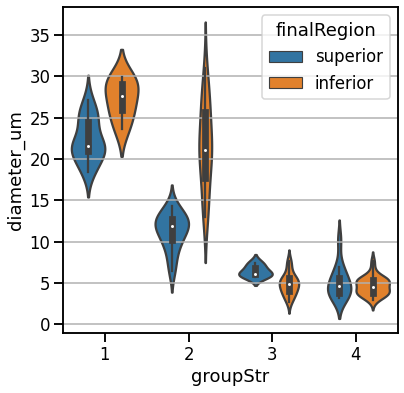

In [8]:
# run stats on san4 headMid versus san4 tail

loadedSan = 'SAN5'
oneDf = mainSanDict[loadedSan]['df']

dfHeadMid = oneDf[ oneDf['finalRegion']=='superior']
print(loadedSan, 'superior')
desc = dfHeadMid.groupby('group')['diameter_um'].describe()
display(desc)

dfTail = oneDf[ oneDf['finalRegion']=='inferior']
print(loadedSan, 'inferior')
desc = dfTail.groupby('group')['diameter_um'].describe()
display(desc)

theseGroups = [1,2,3,4]
for group in theseGroups:
    supBranchList = dfHeadMid[ dfHeadMid['group']==group ]['diameter_um'].tolist()
    infBranchList = dfTail[ dfTail['group']==group ]['diameter_um'].tolist()

    # alternative from {None, ‘two-sided’, ‘less’, ‘greater’}
    statistic, p = scipy.stats.mannwhitneyu(supBranchList, infBranchList) #, alternative='two-sided')

    print(loadedSan, 'group:', group, statistic, 'p:', p)


#
# plot each sup/inf violin
fig, ax = plt.subplots(1,1, figsize=(6,6), sharey=True)

print('loadedSan:', loadedSan)

regionList = ['superior', 'inferior']
groupList = [1,2,3,4]

tmpDf = oneDf [ oneDf['group'].isin(groupList) ]
tmpDf = tmpDf[ tmpDf['finalRegion'].isin(regionList) ]
              
sns.violinplot(data=tmpDf, x='groupStr', y='diameter_um', hue='finalRegion', hue_order=regionList, ax=ax)
ax.grid(which='major', axis='y')
#axs[0].get_legend().remove()

plt.show;

# Plot max project and tracing for ONE San (specify loadedSan)
# use this for 2x frids (headMid, tail)

extent1: [0, 3552, 7104, 0]
xTailOffset: 783
yTailOffset: 6650
extent2: [783, 4335, 14938, 6650]
xMax: 4335 yMax: 6650


/home/cudmore/anaconda3/envs/sanode-env/lib/python3.6/site-packages/ipykernel_launcher.py:67: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/cudmore/anaconda3/envs/sanode-env/lib/python3.6/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



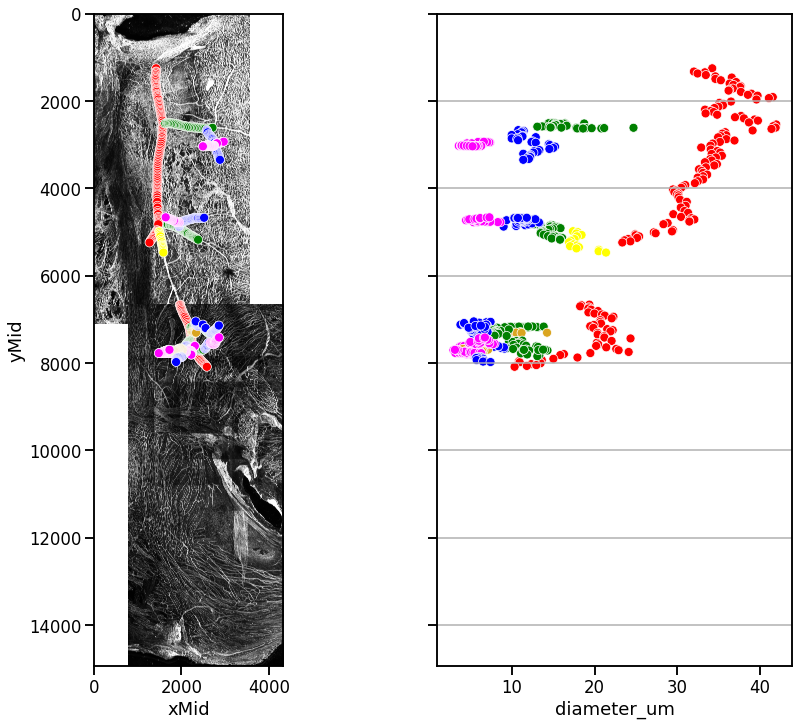

In [9]:
# plot 2 images, one offset from the other
# using dfHeadMid and dfTail from above to check my subset using yMid range

loadedSan = 'SAN4'
oneDf = mainSanDict[loadedSan]['df']
#maxImg = mainSanDict[loadedSan]['maxImg']
maxImg1 = mainSanDict[loadedSan]['maxImg1']
maxImg2 = mainSanDict[loadedSan]['maxImg2']
xTailOffset = mainSanDict[loadedSan]['xTailOffset']
yTailOffset = mainSanDict[loadedSan]['yTailOffset']

fig, axs = plt.subplots(1,2, figsize=(14,12), sharey=True)

numRows, numCols = maxImg1.shape

xMin = 0
xMax = numCols
yMin = 0
yMax = numRows
extent1 =[xMin, xMax, yMax, yMin] # y-flipped
print('extent1:', extent1)
axs[0].imshow(maxImg1, extent=extent1, cmap='gray')

print('xTailOffset:', xTailOffset)
print('yTailOffset:', yTailOffset)

numRows2, numCols2 = maxImg2.shape
xMin = xTailOffset
xMax = xTailOffset + numCols2

yMin = yTailOffset + numRows2
yMax = yTailOffset # y-flipped

extent2 = [xMin, xMax, yMin, yMax]
print('extent2:', extent2)
axs[0].imshow(maxImg2, extent=extent2, cmap='gray')

#axs[0].set_xlim(0, 4335)
#axs[0].set_ylim(14938, 0)
print('xMax:', xMax, 'yMax:', yMax)
axs[0].set_xlim(0, xMax)
axs[0].set_ylim(yMin, 0) # y-flipped

doJustHeadTail = False
if doJustHeadTail:
    dfHeadMid = oneDf[ oneDf['origRegions']=='headMid' ]
else:
    # all superior
    dfHeadMid = oneDf[ oneDf['finalRegion']=='superior']

if doJustHeadTail:
    dfTail = oneDf[ oneDf['origRegions']=='tail' ]
else:
    dfTail = oneDf[ oneDf['finalRegion']=='inferior']



size = dfHeadMid['diameter_um'].tolist()
sns.scatterplot(data=dfHeadMid, x='xMid', y='yMid', hue='groupStr', palette=groupColorDict, legend=False, ax=axs[0])

#df2 = df[ df['origRegions']=='tail' ]
x = dfTail['xMid'].tolist()
y = dfTail['yMid'].tolist()
# offset x/y
x = [orig_x+xTailOffset for orig_x in x]
y = [orig_y+yTailOffset for orig_y in y]
dfTail['xMidOffset'] = x
dfTail['yMidOffset'] = y


size = dfTail['diameter_um'].tolist()
sns.scatterplot(data=dfTail, x='xMidOffset', y='yMidOffset', hue='groupStr', palette=groupColorDict,
                legend=False, ax=axs[0])

# diam of group 1
sns.scatterplot(data=dfHeadMid, x='diameter_um', y='yMid', hue='groupStr', palette=groupColorDict,
                legend=False, ax=axs[1])

sns.scatterplot(data=dfTail, x='diameter_um', y='yMidOffset', hue='groupStr', palette=groupColorDict,
                legend=False, ax=axs[1])

axs[1].grid(which='major', axis='y')

plt.show()

# Plot max project and tracing for ONE San (specify loadedSan)
# use this for 1x frids (headMidTail)
## todo: expand this to plot just my selected superior/inferior. For now it plots entire tracing

extent1: [0, 3552, 7104, 0]


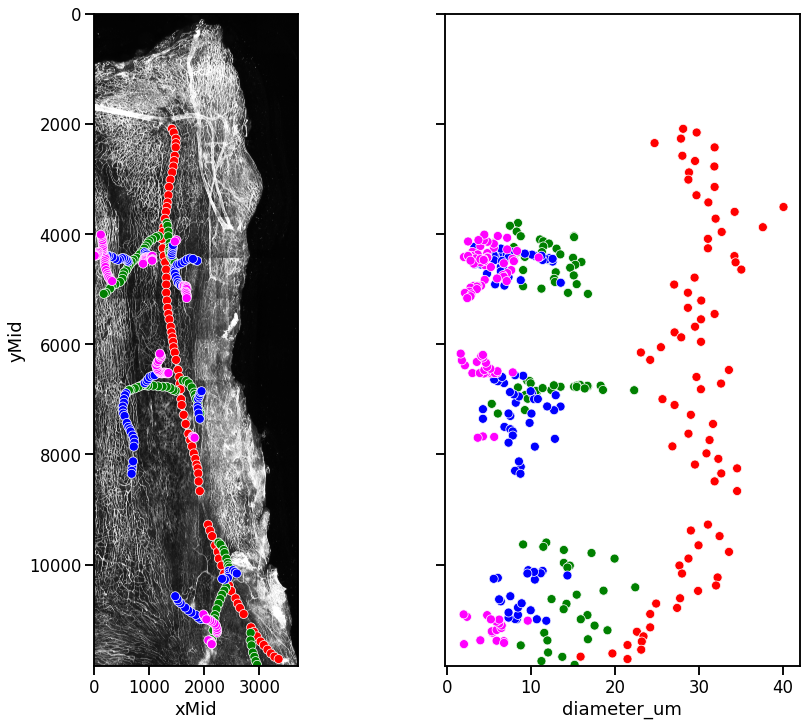

In [10]:
# plot 2 images, one offset from the other
# using dfHeadMid and dfTail from above to check my subset using yMid range

loadedSan = 'SAN6'
oneDf = mainSanDict[loadedSan]['df']
maxImg = mainSanDict[loadedSan]['maxImg']

fig, axs = plt.subplots(1,2, figsize=(14,12), sharey=True)

numRows, numCols = maxImg.shape

xMin = 0
xMax = numCols
yMin = 0
yMax = numRows
extent =[xMin, xMax, yMax, yMin] # y-flipped
print('extent1:', extent1)
axs[0].imshow(maxImg, extent=extent, cmap='gray')

size = oneDf['diameter_um'].tolist()
sns.scatterplot(data=oneDf, x='xMid', y='yMid', hue='groupStr', palette=groupColorDict,
                legend=False, ax=axs[0])

# diam of group 1
sns.scatterplot(data=oneDf, x='diameter_um', y='yMid', hue='groupStr', palette=groupColorDict,
                legend=False, ax=axs[1])

sns.scatterplot(data=oneDf, x='diameter_um', y='yMid', hue='groupStr', palette=groupColorDict,
                legend=False, ax=axs[1])

#axs[1].grid(which='major', axis='y')

plt.show()

# Older code after this - NOT NEEDED

In [134]:
if 0:
    # san5 (lectin)
    loadedSan = 'SAN5'
    origRegions = 'headMidTail'
    path = '/media/cudmore/data/san-density/SAN5/tracing/SAN5_BIG__ch1.tif'

if 1:
    # san6 (lectin)
    loadedSan = 'SAN6'
    origRegions = 'headMidTail'
    path = '/media/cudmore/data/san-density/SAN6/tracing/SAN6_BIG__ch1.tif'
 
df, maxImg = sanode.bReadROI.loadRoiFiles(path, loadedSan, origRegions)
#df['origRegions'] = origRegions

# group is int64, for plotly to interpret as disrete values (versus continuous) it has to be a string
#df["groupStr"] = df["group"].astype(str)


print(loadedSan, 'df FINAL')
desc = df.groupby('group')['diameter_um'].describe()
display(desc)


loadRoiFile() path: /media/cudmore/data/san-density/SAN6/tracing/SAN6_BIG__ch1.tif
  shape: (1, 3700, 11840)
  x/y/z voxel (um/pixel) 0.3977476346942534 0.3977476346942534 1
  loading zipFilePath: /media/cudmore/data/san-density/SAN6/tracing/RoiSet.zip
SAN6 df FINAL


count       mean       std        min        25%        50%        75%  \
group                                                                           
1       79.0  29.172266  4.073196  15.909905  27.244569  29.529916  31.859561   
2       89.0  12.693852  3.777957   5.336344   9.545943  12.727924  15.280965   
3       99.0   8.217933  2.761082   2.868199   6.413488   7.954953  10.371989   
4       99.0   4.676005  1.830379   1.639956   3.302551   4.446954   5.912944   

             max  
group             
1      40.060118  
2      22.415470  
3      14.340995  
4      10.921776

In [135]:
# violin plot of diameter_um
fig = px.violin(df, y="diameter_um", x="groupStr", color="groupStr", box=True,
            labels={"groupStr": "Branch Order"},
            color_discrete_map=groupColorDict,
            title=loadedSan,
            hover_data=df.columns,
               )
fig.show()

In [136]:

# 2d
fig = px.scatter(df, x="xMid", y="yMid", color='groupStr', size='diameter_um',
                labels={"groupStr": "Branch Order"},
                color_discrete_map=groupColorDict,
                title=loadedSan)
fig['layout']['yaxis']['autorange'] = "reversed"

#3d
#fig = px.scatter_3d(df, x="xMid", y="yMid", z='z', color='groupStr', size='diameter_um',
#                   color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"])
       
fig.show()

In [137]:
# SUPER SLOW WITH PLOTLY
if 0:
    print('maxImg:', type(maxImg), maxImg.dtype, 'shape:', maxImg.shape)

    fig = px.imshow(maxImg, binary_string=True)
    fig.show()


In [138]:
# diam as function of yMid

fig = px.scatter(df, x="diameter_um", y="yMid", color='groupStr', size='diameter_um',
                color_discrete_map=groupColorDict,
                title=loadedSan)
                #color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"])

fig['layout']['yaxis']['autorange'] = "reversed"

fig.show()

In [139]:
# split inter superior/inferior
numRows, numCols = maxImg.shape

if 0:
    # san5
    ySup = [1, 3000]
    yInf = [4400, numRows]

if 1:
    # san6
    ySup = [1, 5500]
    yInf = [9200, 12000]

#sup_df = df[ (df['yMid']>ySup[0]) & (df['yMid']<ySup[1]) ]
#inf_df = df[ (df['yMid']>yInf[0]) & (df['yMid']<yInf[1]) ]

#df[ (df['yMid']>ySup[0]) & (df['yMid']<ySup[1]) ]['finalRegion'] = 'superior'
df.loc[(df['yMid']>ySup[0]) & (df['yMid']<ySup[1]), 'finalRegion'] = 'superior'
df.loc[(df['yMid']>yInf[0]) & (df['yMid']<yInf[1]), 'finalRegion'] = 'inferior'

sup_df = df[ df['finalRegion']=='superior']
inf_df = df[ df['finalRegion']=='inferior']


loadedSan: SAN6


(11840.0, 0.0)

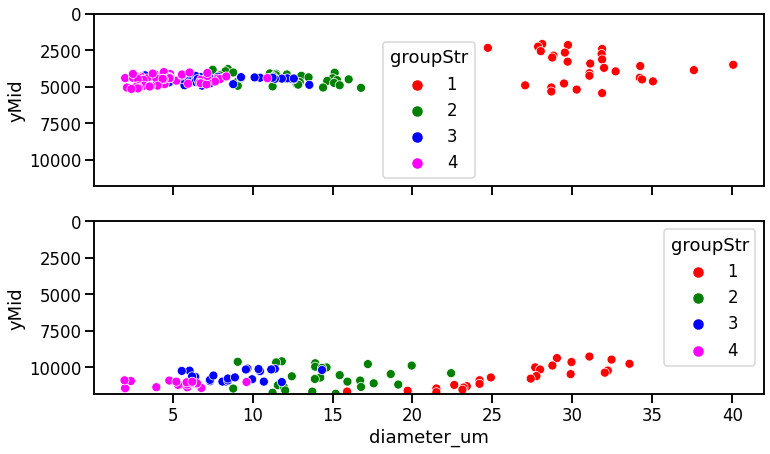

In [140]:
print('loadedSan:', loadedSan)

fig, axs = plt.subplots(2,1, figsize=(12,7), sharex=True)

sns.scatterplot(data=sup_df, x="diameter_um", y="yMid", hue='groupStr', palette=groupColorDict,
               ax=axs[0])
axs[0].set_ylim(numRows, 0) #reversed

sns.scatterplot(data=inf_df, x="diameter_um", y="yMid", hue='groupStr', palette=groupColorDict,
                ax=axs[1])
axs[1].set_ylim(numRows, 0) #reversed


SAN6
  ySup: [1, 5500]
  yInf: [9200, 12000]
SAN6 sup_df


count       mean       std        min        25%        50%        75%  \
group                                                                           
1       29.0  31.041731  3.229450  24.711622  28.737095  31.065083  31.978514   
2       37.0  11.243105  3.261289   5.568467   8.305214  11.472796  14.407032   
3       42.0   7.386690  3.181066   2.868199   5.021223   6.654912  10.378580   
4       56.0   4.596731  1.925936   2.028123   2.995778   4.215735   5.678544   

             max  
group             
1      40.060118  
2      16.780991  
3      13.546796  
4      10.921776

SAN6 inf_df


count       mean       std        min        25%        50%        75%  \
group                                                                           
1       24.0  26.414651  4.563174  15.909905  23.175395  27.533446  29.905218   
2       27.0  14.594944  3.263079   8.786532  11.998472  14.230252  16.752661   
3       22.0   9.007991  2.181994   5.568467   7.387261   8.675069  10.440327   
4       19.0   5.236967  1.993579   1.988738   4.383496   5.872673   6.350299   

             max  
group             
1      33.571408  
2      22.415470  
3      14.340995  
4       9.620232

SAN6 group: 1 157.0 p: 0.00033116892378467155
SAN6 group: 2 250.0 p: 0.00035506971522946974
SAN6 group: 3 311.0 p: 0.016655995792541716
SAN6 group: 4 431.5 p: 0.11150617521234213
loadedSan: SAN6


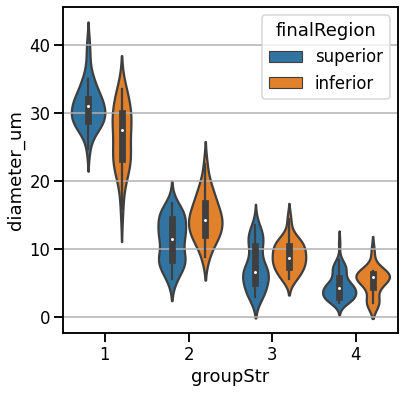

In [141]:
# test if branch order (1) is different between sup/inf
import scipy

print(loadedSan)
print('  ySup:', ySup)
print('  yInf:', yInf)

desc = sup_df.groupby('group')['diameter_um'].describe()
print(loadedSan, 'sup_df')
display(desc)

desc = inf_df.groupby('group')['diameter_um'].describe()
print(loadedSan, 'inf_df')
display(desc)


theseGroups = [1,2,3,4]
for group in theseGroups:
    supBranchList = sup_df[ sup_df['group']==group ]['diameter_um'].tolist()
    infBranchList = inf_df[ inf_df['group']==group ]['diameter_um'].tolist()

    # alternative from {None, ‘two-sided’, ‘less’, ‘greater’}
    statistic, p = scipy.stats.mannwhitneyu(supBranchList, infBranchList)

    print(loadedSan, 'group:', group, statistic, 'p:', p)

#
# plot each sup/inf violin
fig, ax = plt.subplots(1,1, figsize=(6,6), sharey=True)

print('loadedSan:', loadedSan)

regionList = ['superior', 'inferior']
groupList = [1,2,3,4]

tmpDf = df [ df['group'].isin(groupList) ]
tmpDf = tmpDf[ tmpDf['finalRegion'].isin(regionList) ]
              
sns.violinplot(data=tmpDf, x='groupStr', y='diameter_um', hue='finalRegion', 
               title=loadedSan, legend=False, ax=ax)
ax.grid(which='major', axis='y')
#ax.get_legend().remove()

plt.show;